In [1]:
#IMPPORTING LIBARIRES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
import requests 
import json
import glob
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

/Users/mulakapranathi/Desktop/Youtube/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# DATA PREPROCESSING

In [2]:
#LOADING THE DATASET FROM CVS FILE TO PANDAS DATAFRAME
df=pd.read_csv('/Users/mulakapranathi/Downloads/classification_data.csv')


In [3]:
#HEAD OF THE DATAFRAME
df.head()

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01


In [4]:
#FINDING THE SHAPE OF ROWS AND COLUMES
df.shape

(100000, 46)

In [5]:
#GETTING INFOEMATION ABOUT THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [6]:
#CHECKING MISSING VALUES
df.isnull().sum()

count_session             0
count_hit                 0
channelGrouping           0
totals_newVisits          0
device_browser            0
device_operatingSystem    0
device_isMobile           0
device_deviceCategory     0
geoNetwork_region         0
geoNetwork_latitude       0
geoNetwork_longitude      0
historic_session          0
historic_session_page     0
youtube                   0
avg_session_time          0
avg_session_time_page     0
single_page_rate          0
sessionQualityDim         0
last_visitId              0
latest_visit_id           0
visitId_threshold         0
earliest_visit_id         0
earliest_visit_number     0
latest_visit_number       0
time_earliest_visit       0
time_latest_visit         0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_medium           0
latest_medium             0
earliest_keyword    

In [7]:
df.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 't

In [8]:
#drop features 
columns_to_drop = ['latest_medium','earliest_medium','days_since_first_visit','products_array','latest_source','earliest_source','num_interactions','avg_session_time_page','days_since_last_visit','device_deviceCategory','device_isMobile','device_operatingSystem','device_browser','channelGrouping','transactionRevenue','historic_session_page', 'youtube', 'single_page_rate', 'last_visitId','time_on_site','latest_visit_id', 'visitId_threshold', 'earliest_visit_id', 'earliest_visit_number','bounce_rate','latest_visit_number', 'time_earliest_visit', 'time_latest_visit', 'avg_visit_time', 'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect', 'latest_isTrueDirect', 'bounces']

In [9]:
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [10]:
df

,count_session,count_hit,totals_newVisits,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,historic_session,avg_session_time,sessionQualityDim,visits_per_day,has_converted,target_date
0,9,1194,0,Sharjah,25.3463,55.4209,6504,722.666667,6,66.333333,0,2021-01-01
1,9,1194,0,Sharjah,25.3463,55.4209,6504,722.666667,6,66.333333,0,2021-01-01
2,28,1816,0,Ajman,25.4052,55.5136,12466,445.214286,4,73.480000,1,2021-01-01
3,2,299,0,Abu Dhabi,24.4539,54.3773,1575,787.500000,42,37.375000,0,2021-01-01
4,2,299,0,Abu Dhabi,24.4539,54.3773,1575,787.500000,42,37.375000,0,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,58,12340,0,Dubai,25.2048,55.2708,28082,484.172414,11,398.064516,1,2021-01-01
99996,58,12340,0,Dubai,25.2048,55.2708,28082,484.172414,11,398.064516,1,2021-01-01
99997,58,12340,0,Dubai,25.2048,55.2708,28082,484.172414,11,398.064516,1,2021-01-01
99998,58,12340,0,Dubai,25.2048,55.2708,28082,484.172414,11,398.064516,1,2021-01-01


In [11]:
df.shape

(100000, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   count_session         100000 non-null  int64  
 1   count_hit             100000 non-null  int64  
 2   totals_newVisits      100000 non-null  int64  
 3   geoNetwork_region     100000 non-null  object 
 4   geoNetwork_latitude   100000 non-null  float64
 5   geoNetwork_longitude  100000 non-null  float64
 6   historic_session      100000 non-null  int64  
 7   avg_session_time      100000 non-null  float64
 8   sessionQualityDim     100000 non-null  int64  
 9   visits_per_day        100000 non-null  float64
 10  has_converted         100000 non-null  int64  
 11  target_date           100000 non-null  object 
dtypes: float64(4), int64(6), object(2)
memory usage: 9.2+ MB


In [13]:
df.columns

Index(['count_session', 'count_hit', 'totals_newVisits', 'geoNetwork_region',
       'geoNetwork_latitude', 'geoNetwork_longitude', 'historic_session',
       'avg_session_time', 'sessionQualityDim', 'visits_per_day',
       'has_converted', 'target_date'],
      dtype='object')

#Data Visualization

In [14]:
# Define the numerical and categorical features
numerical_features = ['count_session', 'count_hit', 'avg_session_time', 'sessionQualityDim', 'visits_per_day']
categorical_features = ['geoNetwork_region', 'historic_session', 'has_converted', 'target_date']

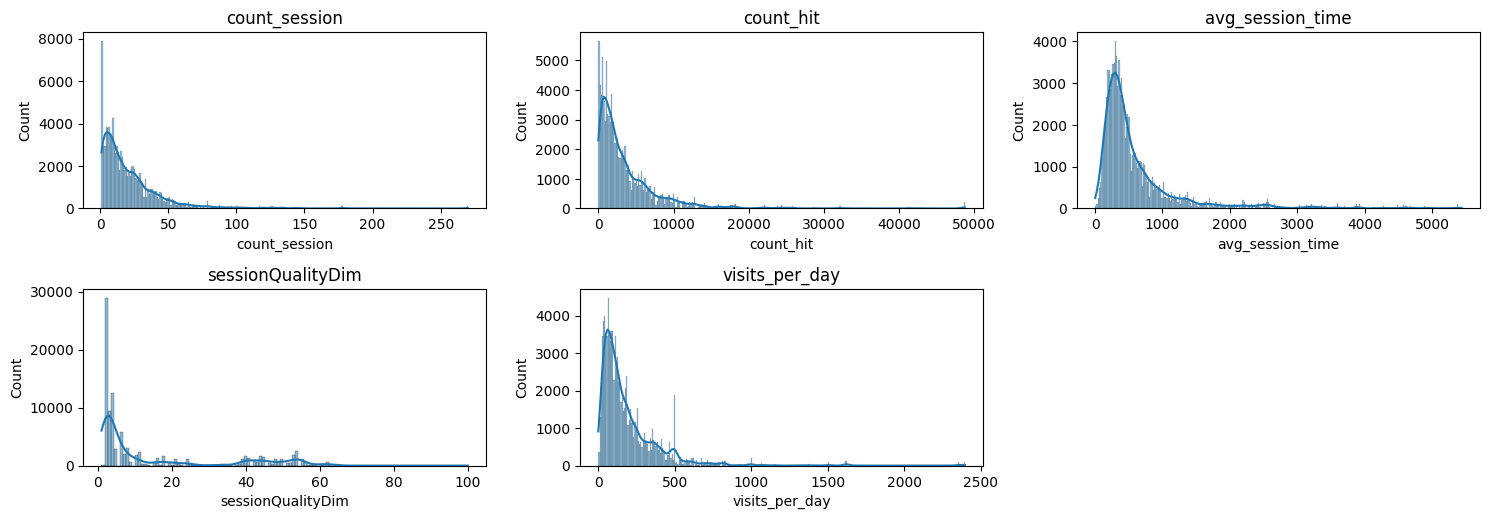

In [15]:
# Plotting numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

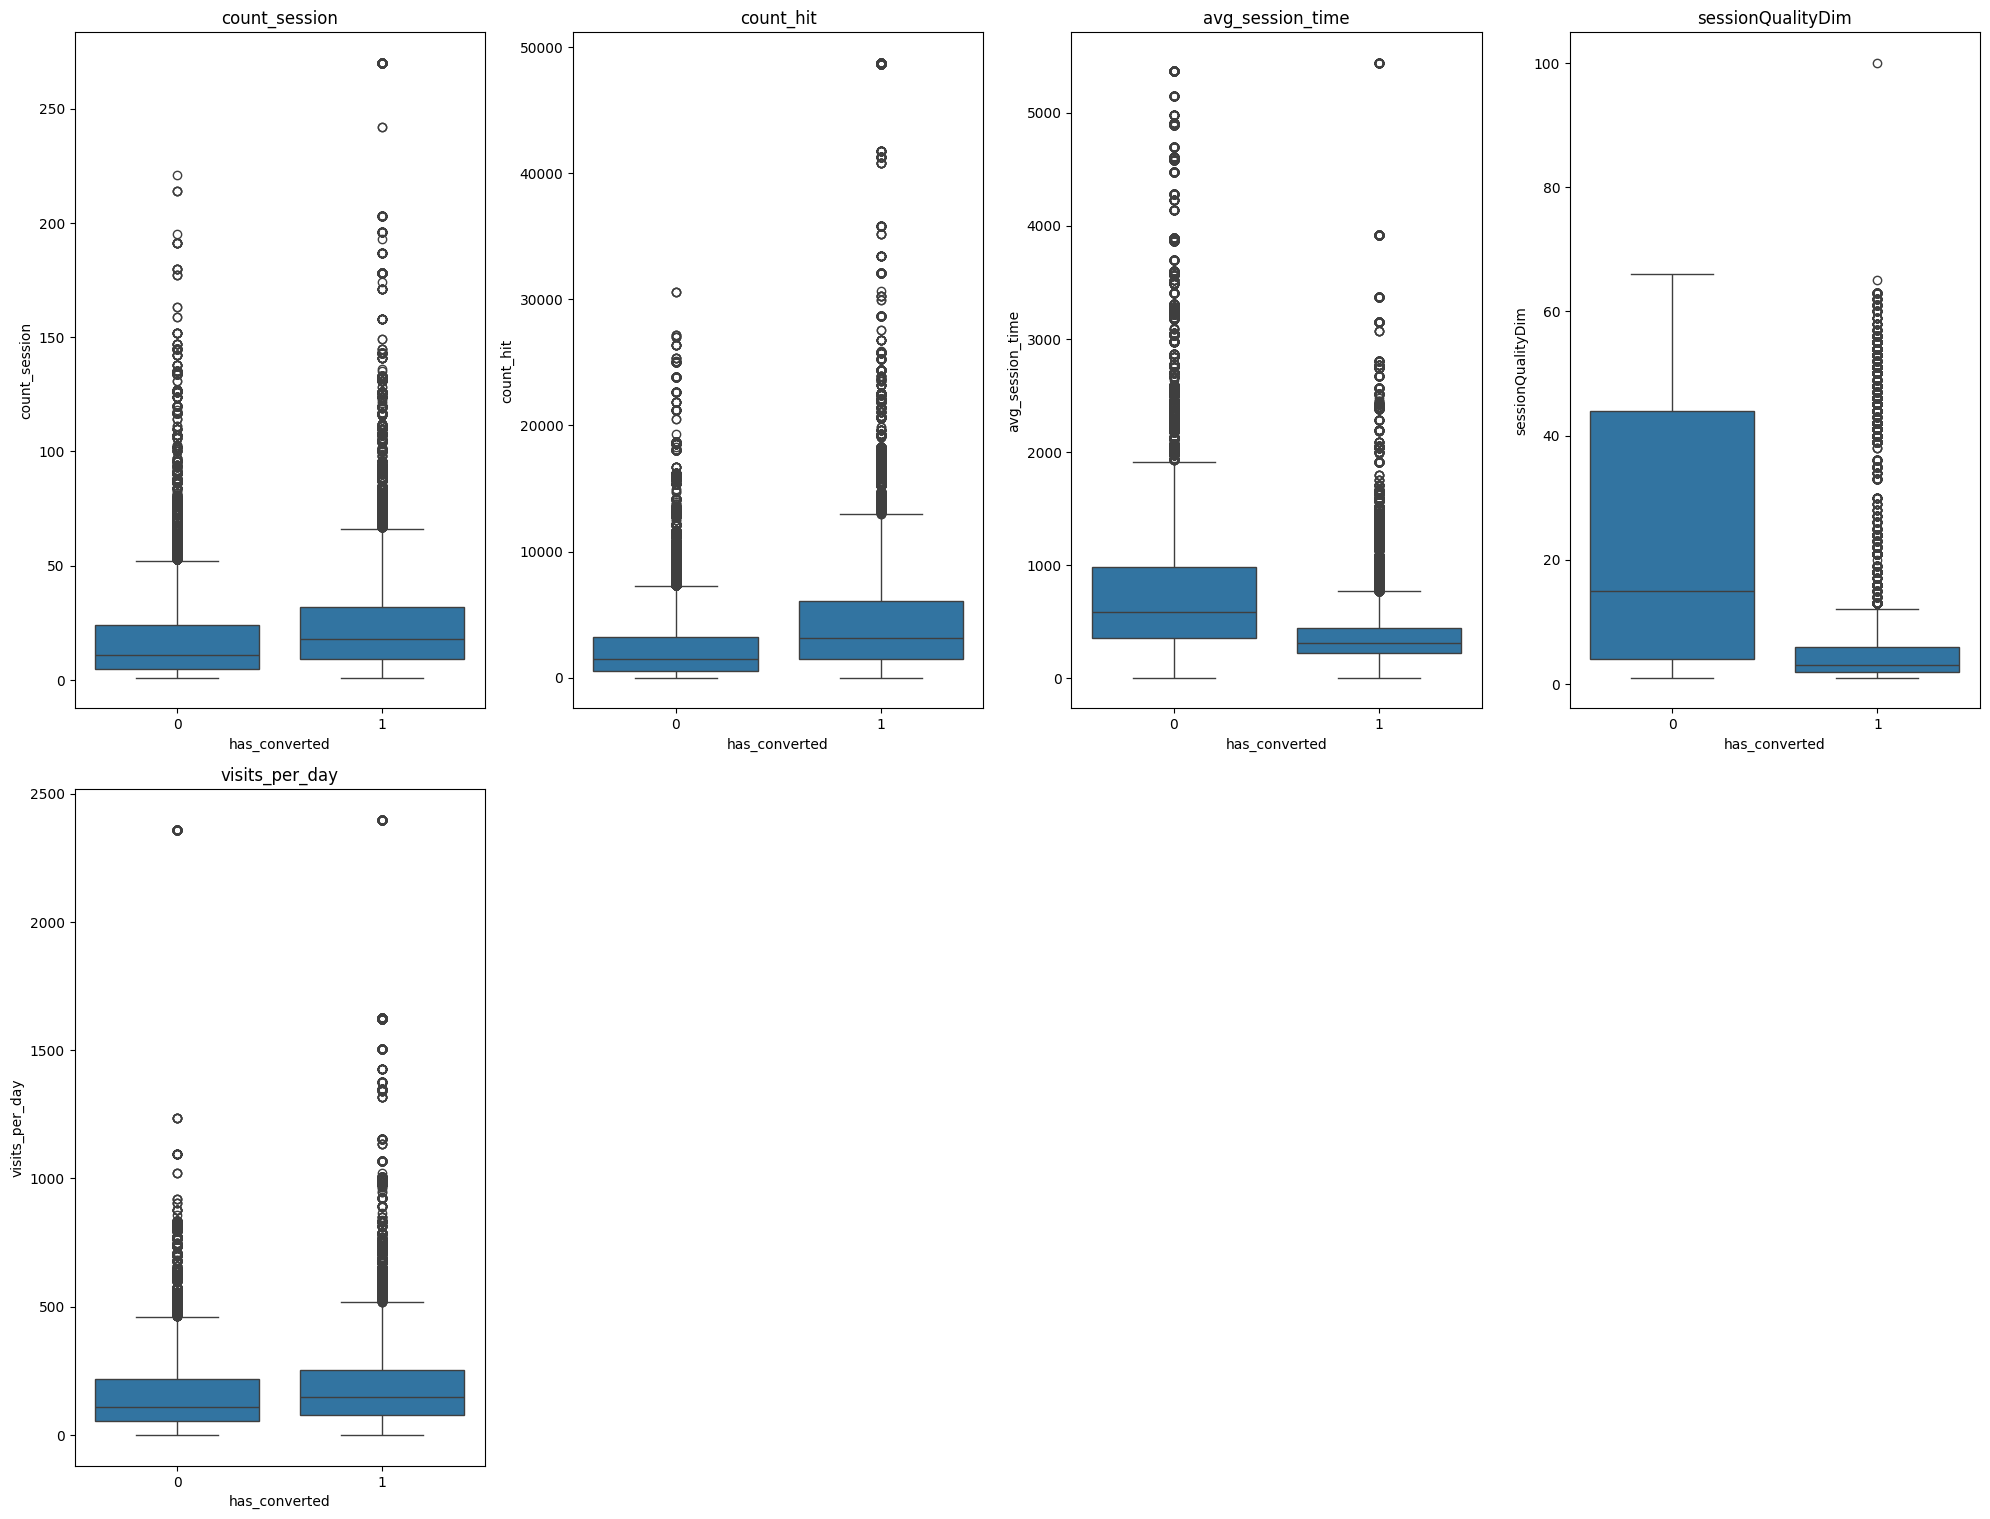

In [16]:
# Bivariate Analysis
# Plotting relationships between numerical features and 'has_converted'
plt.figure(figsize=(20, 30))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='has_converted', y=feature, data=df)
    plt.title(feature)

plt.tight_layout()
plt.show()

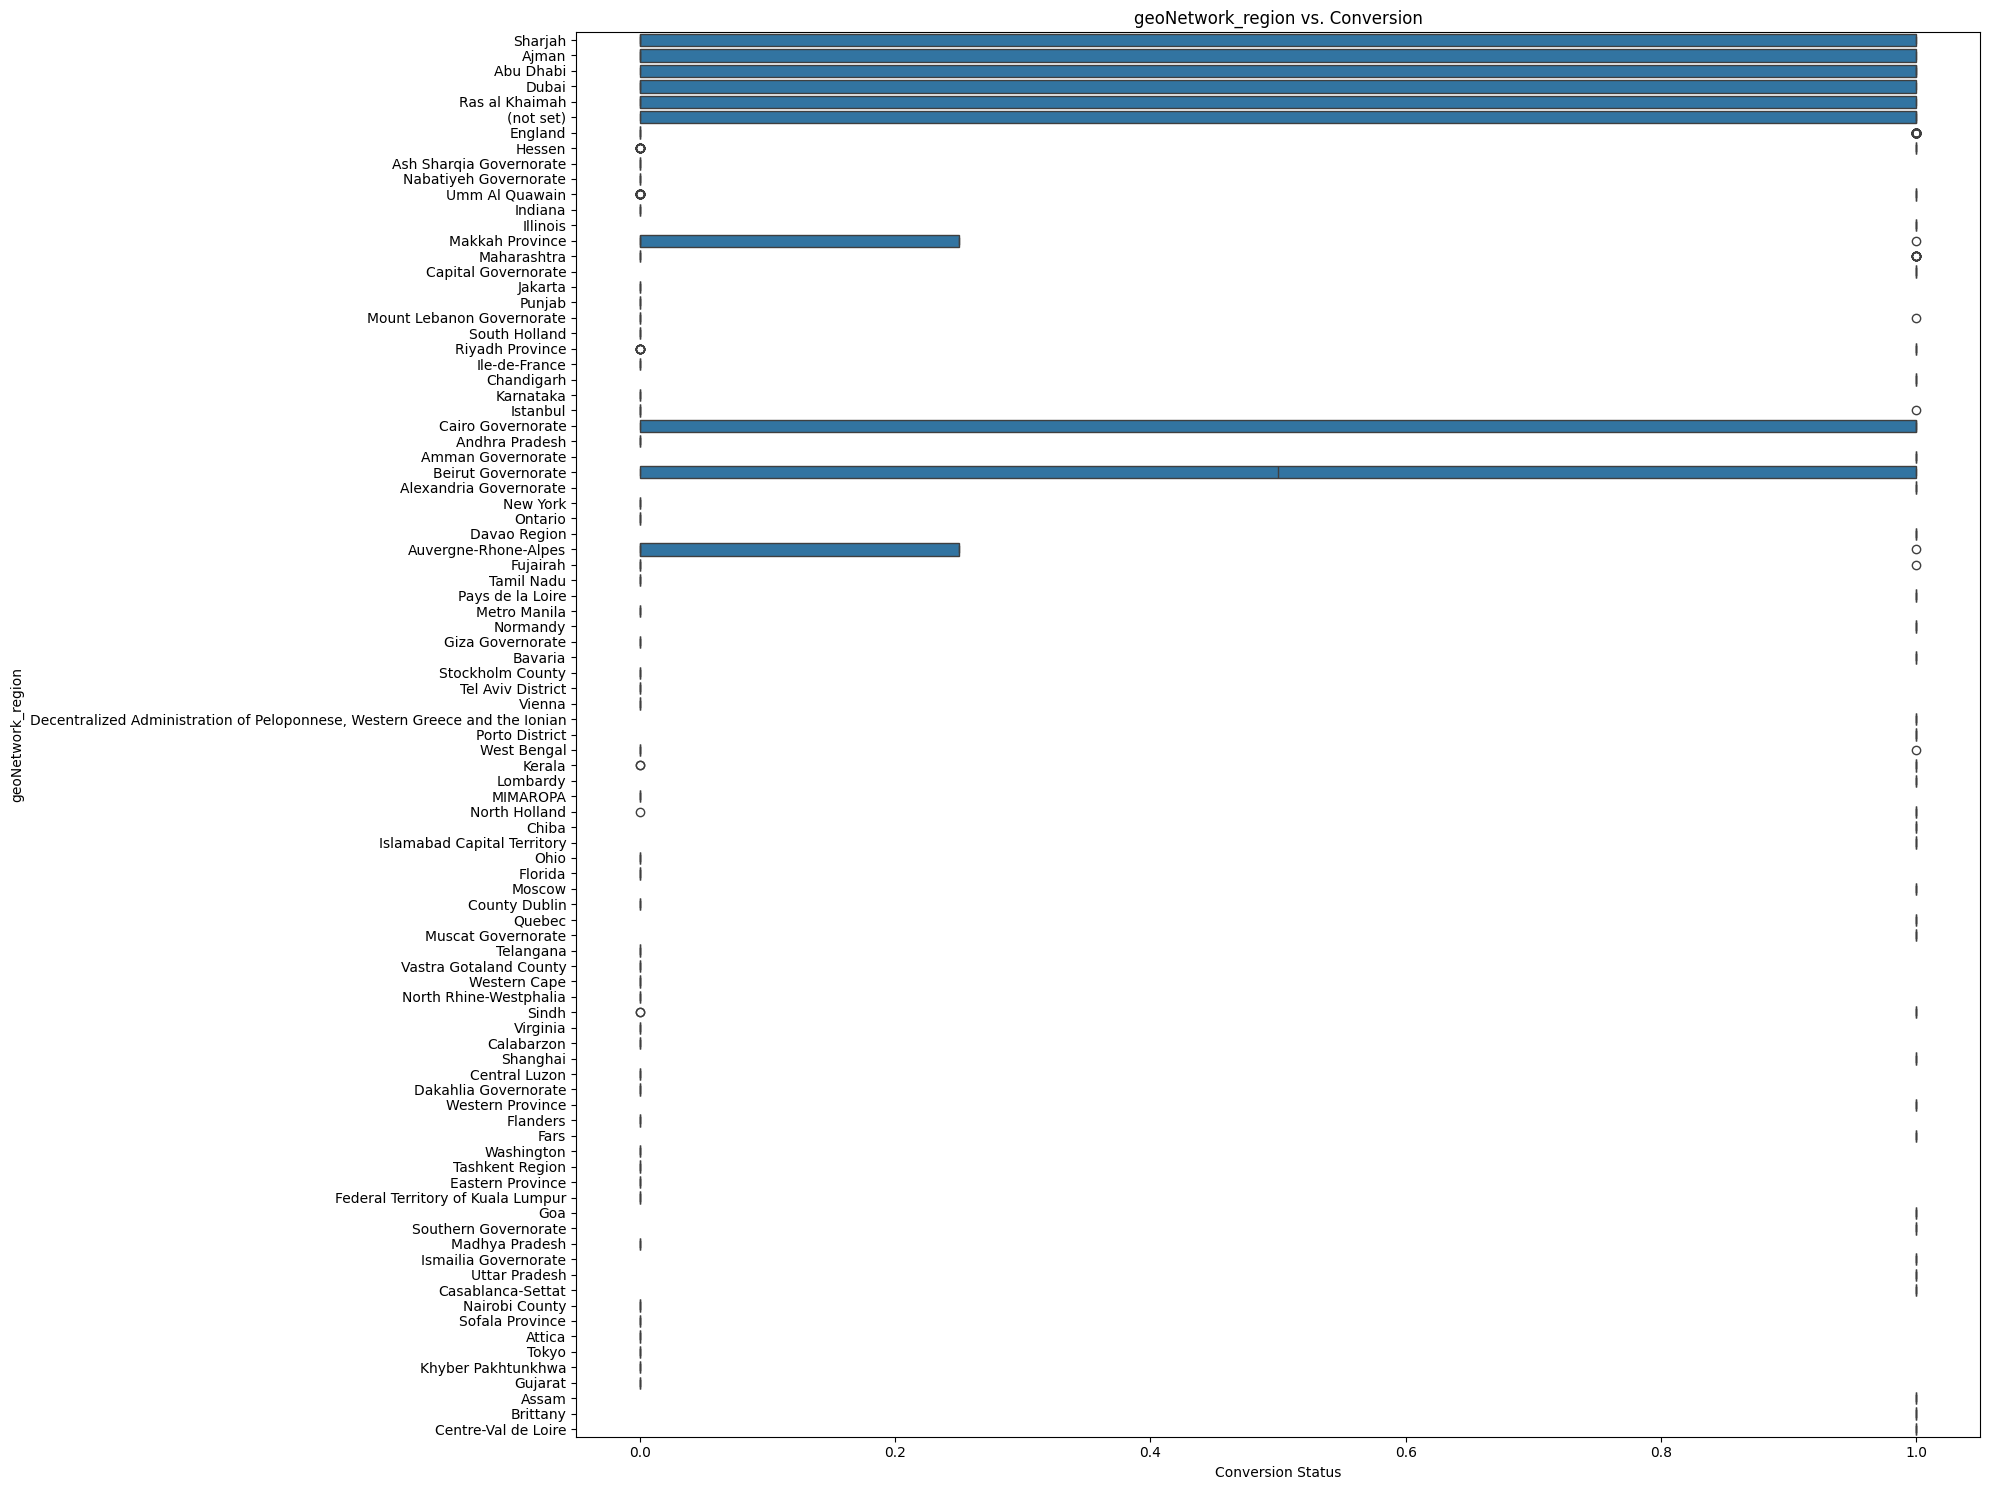

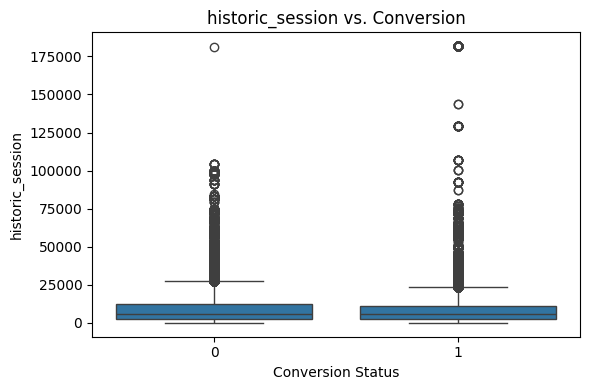

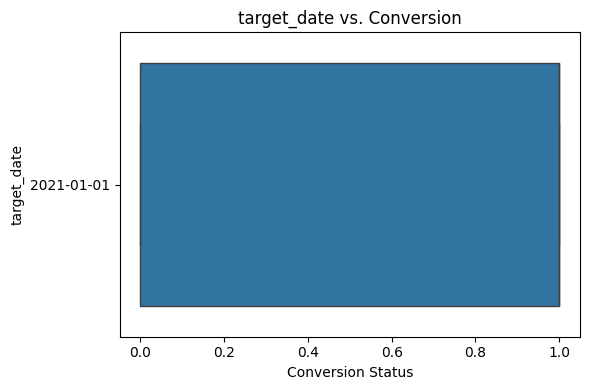

In [17]:
plt.figure(figsize=(20, 15))
sns.boxplot(x='has_converted', y='geoNetwork_region', data=df)
plt.title('geoNetwork_region vs. Conversion')
plt.xlabel('Conversion Status')
plt.ylabel('geoNetwork_region')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='has_converted', y='historic_session', data=df)
plt.title('historic_session vs. Conversion')
plt.xlabel('Conversion Status')
plt.ylabel('historic_session')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='has_converted', y='target_date', data=df)
plt.title('target_date vs. Conversion')
plt.xlabel('Conversion Status')
plt.ylabel('target_date')
plt.tight_layout()
plt.show()

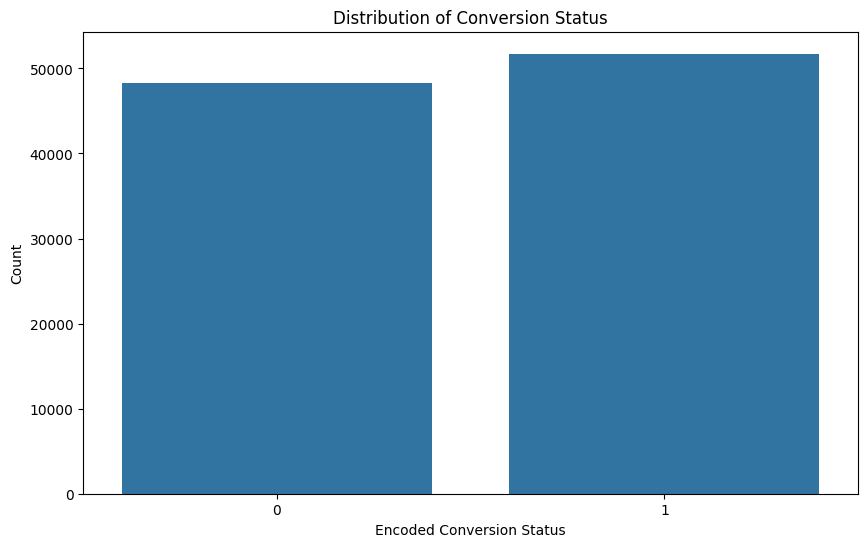

In [18]:
# Instantiate the LabelEncoder
le = LabelEncoder()

# Encode the 'has_converted' column
df["has_converted"] = le.fit_transform(df["has_converted"])

# Create the countplot with a larger figure size
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='has_converted')
plt.title('Distribution of Conversion Status')
plt.xlabel('Encoded Conversion Status')
plt.ylabel('Count')
plt.show()

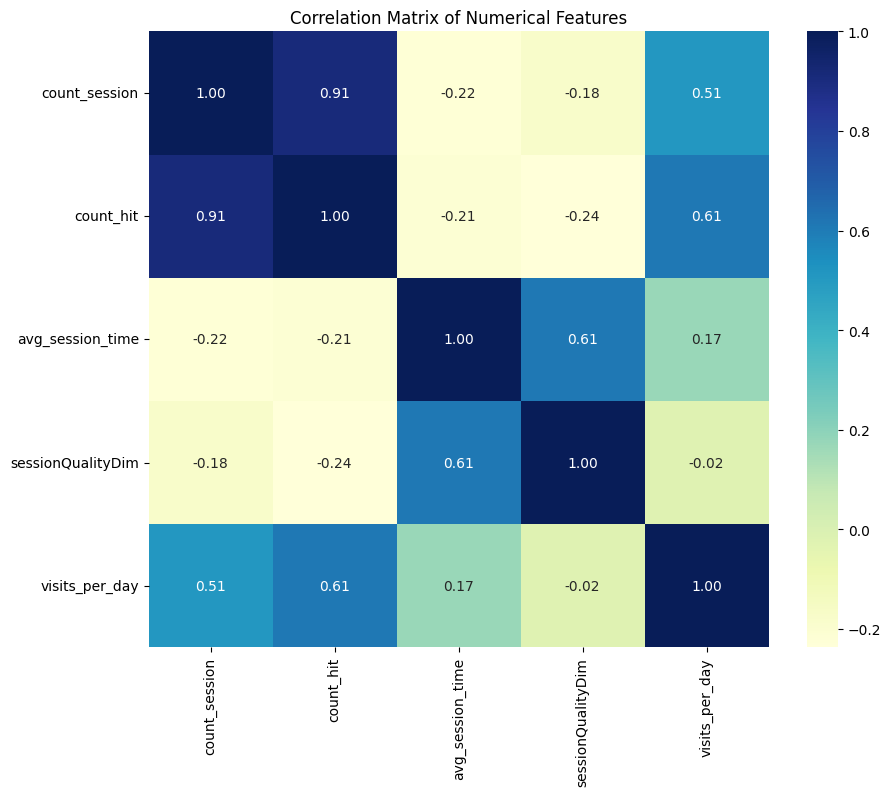

In [19]:
# Define numerical features
numerical_features = ['count_session', 'count_hit', 'avg_session_time', 'sessionQualityDim', 'visits_per_day']

# Compute the correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [20]:
# Descriptive statistics for numerical features
numerical_summary = df[numerical_features].describe()
print("Descriptive Statistics for Numerical Features:")
print(numerical_summary)

Descriptive Statistics for Numerical Features:
       count_session      count_hit  avg_session_time  sessionQualityDim  \
count  100000.000000  100000.000000     100000.000000      100000.000000   
mean       21.532440    3671.722790        617.050355          14.985540   
std        24.002385    4627.338737        670.494052          18.581261   
min         1.000000       2.000000          2.000000           1.000000   
25%         6.000000     971.000000        264.096774           2.000000   
50%        15.000000    2209.000000        396.546296           4.000000   
75%        29.000000    4812.000000        686.875000          21.000000   
max       270.000000   48744.000000       5441.000000         100.000000   

       visits_per_day  
count   100000.000000  
mean       188.959363  
std        206.667006  
min          0.923077  
25%         66.500000  
50%        126.178571  
75%        243.607143  
max       2397.333333  


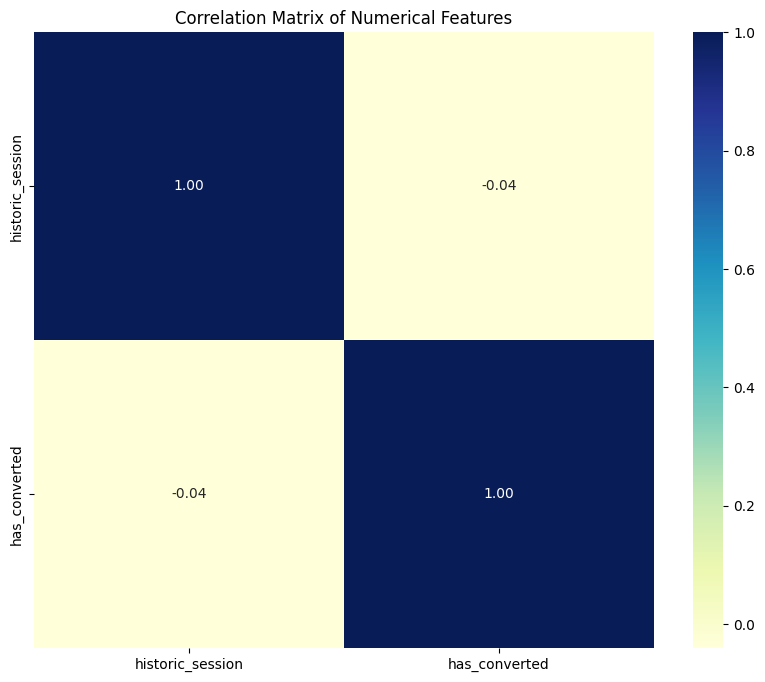

In [21]:
# Define numerical features
categorical_features = ['geoNetwork_region', 'historic_session', 'has_converted', 'target_date']

# Compute the correlation matrix
corr_matrix = df[categorical_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [22]:
# Frequency counts for categorical features
for feature in categorical_features:
    print(f"\nFrequency Counts for {feature}:")
    print(df[feature].value_counts())


Frequency Counts for geoNetwork_region:
Dubai                    51481
Abu Dhabi                33799
Sharjah                   7214
Ajman                     4157
Ras al Khaimah            1298
                         ...  
Western Province             1
Nabatiyeh Governorate        1
Western Cape                 1
Quebec                       1
Chandigarh                   1
Name: geoNetwork_region, Length: 91, dtype: int64

Frequency Counts for historic_session:
6827     239
10663    194
990      192
1872     180
9260     177
        ... 
509        1
1639       1
9542       1
26699      1
7407       1
Name: historic_session, Length: 6979, dtype: int64

Frequency Counts for has_converted:
1    51727
0    48273
Name: has_converted, dtype: int64

Frequency Counts for target_date:
2021-01-01    100000
Name: target_date, dtype: int64


In [23]:
from scipy.stats import chi2_contingency

# Chi-square test for association between categorical features and 'has_converted'
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['has_converted'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi-square Test for {feature} and has_converted:")
    print(f"Chi-square Statistic: {chi2_stat}")
    print(f"P-value: {p_val}")


Chi-square Test for geoNetwork_region and has_converted:
Chi-square Statistic: 2319.2496740033675
P-value: 0.0

Chi-square Test for historic_session and has_converted:
Chi-square Statistic: 88307.22655120774
P-value: 0.0

Chi-square Test for has_converted and has_converted:
Chi-square Statistic: 99995.9952623493
P-value: 0.0

Chi-square Test for target_date and has_converted:
Chi-square Statistic: 0.0
P-value: 1.0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separating features (X) and target variable (y)
X = df[['count_session', 'count_hit', 'avg_session_time', 'sessionQualityDim', 'visits_per_day', 'geoNetwork_region', 'historic_session']]
y = df['has_converted']

# One-hot encode the 'geoNetwork_region' column
X = pd.get_dummies(X, columns=['geoNetwork_region'])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model 1: Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Classification Report:")
print(classification_report(y_test, dt_predictions))

# Model 2: Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Classifier Accuracy:", rf_accuracy)
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# Model 3: Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("\nLogistic Regression Accuracy:", lr_accuracy)
print("Classification Report:")
print(classification_report(y_test, lr_predictions))


Decision Tree Classifier Accuracy: 0.9872
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9693
           1       0.99      0.99      0.99     10307

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000


Random Forest Classifier Accuracy: 0.99155
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9693
           1       0.99      0.99      0.99     10307

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000


Logistic Regression Accuracy: 0.76735
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      9693
           1       0.77      0.79      0.78

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

# Separating features (X) and target variable (Y)
X = df[['count_session', 'count_hit', 'avg_session_time', 'sessionQualityDim', 'visits_per_day', 'geoNetwork_region', 'historic_session']]
Y = df['has_converted']

# Encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
X_ohe = ohe.fit_transform(X[['geoNetwork_region']]).toarray()

# Binarizing the target variable
be = LabelBinarizer()
y = be.fit_transform(Y)

# Concatenating encoded features with original features
X = np.concatenate((X.drop(columns=['geoNetwork_region']).values, X_ohe), axis=1)

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, rf_predictions)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.99175
Confusion Matrix:
[[ 9641    52]
 [  113 10194]]


Confusion Matrix:
[[7243 2450]
 [2203 8104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      9693
           1       0.77      0.79      0.78     10307

    accuracy                           0.77     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.77      0.77      0.77     20000



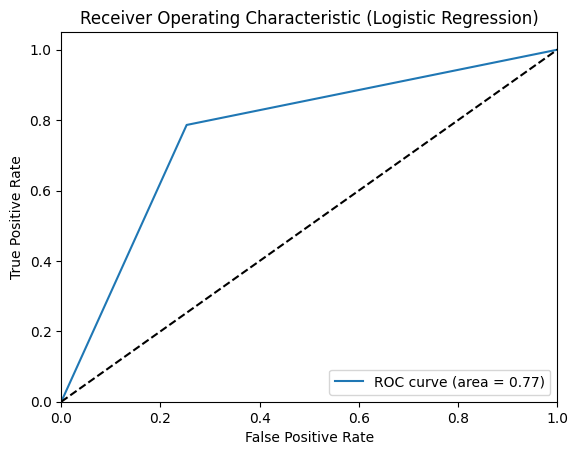

In [36]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))
print("Classification Report:")
print(classification_report(y_test, lr_predictions))

# ROC curve and AUC for Logistic Regression (as an example)
fpr, tpr, thresholds = roc_curve(y_test, lr_predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[ 9560   133]
 [  123 10184]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9693
           1       0.99      0.99      0.99     10307

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



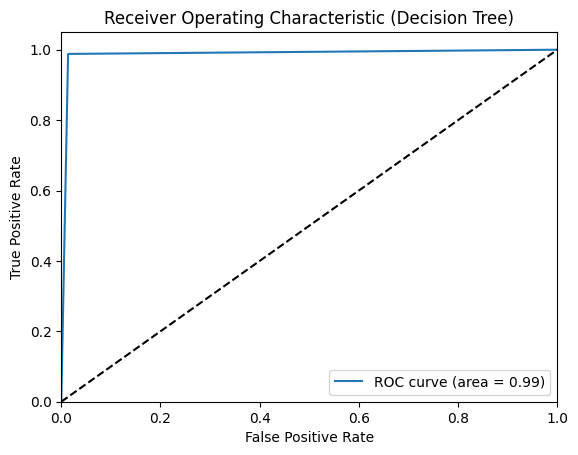

In [38]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))
print("Classification Report:")
print(classification_report(y_test, dt_predictions))

# ROC curve and AUC for Decision Tree (as an example)
fpr, tpr, thresholds = roc_curve(y_test, dt_predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

In [42]:
df

,count_session,count_hit,totals_newVisits,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,historic_session,avg_session_time,sessionQualityDim,visits_per_day,has_converted,target_year,target_month,target_day
0,9,1194,0,Sharjah,25.3463,55.4209,6504,722.666667,6,66.333333,0,2021,1,1
1,9,1194,0,Sharjah,25.3463,55.4209,6504,722.666667,6,66.333333,0,2021,1,1
2,28,1816,0,Ajman,25.4052,55.5136,12466,445.214286,4,73.480000,1,2021,1,1
3,2,299,0,Abu Dhabi,24.4539,54.3773,1575,787.500000,42,37.375000,0,2021,1,1
4,2,299,0,Abu Dhabi,24.4539,54.3773,1575,787.500000,42,37.375000,0,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,58,12340,0,Dubai,25.2048,55.2708,28082,484.172414,11,398.064516,1,2021,1,1
99996,58,12340,0,Dubai,25.2048,55.2708,28082,484.172414,11,398.064516,1,2021,1,1
99997,58,12340,0,Dubai,25.2048,55.2708,28082,484.172414,11,398.064516,1,2021,1,1
99998,58,12340,0,Dubai,25.2048,55.2708,28082,484.172414,11,398.064516,1,2021,1,1


In [53]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are defined
X = df[['count_session', 'count_hit', 'avg_session_time', 'sessionQualityDim', 'visits_per_day', 'geoNetwork_region', 'historic_session']]
y = df['has_converted']

X_df = pd.DataFrame(X)

# Define and fit OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['geoNetwork_region']])

# Define and fit StandardScaler
scaler = StandardScaler()
X_encoded = ohe.transform(X[['geoNetwork_region']])
X_encoded = pd.DataFrame(X_encoded.toarray(), columns=ohe.get_feature_names_out(['geoNetwork_region']))
X_scaled = scaler.fit_transform(X_encoded)

# Define and fit RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_scaled, y)

# Assuming new_sample is defined and contains the new sample data
new_sample = df[['count_session', 'count_hit', 'avg_session_time', 'sessionQualityDim', 'visits_per_day', 'geoNetwork_region', 'historic_session']]

# Transform new sample
new_sample_encoded = ohe.transform(new_sample[['geoNetwork_region']])
new_sample_encoded = pd.DataFrame(new_sample_encoded.toarray(), columns=ohe.get_feature_names_out(['geoNetwork_region']))
new_sample_scaled = scaler.transform(new_sample_encoded)

# Predict using RandomForestClassifier
new_pred = rf_classifier.predict(new_sample_scaled)

# Output the prediction
if 1 in new_pred:
    print('The status is: converted')
else:
    print('The status is: Not converted')


The status is: converted


In [54]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)